# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below. 

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [12]:
# Codewrite cell (Use as you wish)

# K-means clustering algorithm
def kmeans(X, k, num_iters=100):
    n_samples, n_features = X.shape
    # Randomly initialize the centroids
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    labels = np.zeros(n_samples)
    
    for _ in range(num_iters):
        # Compute distances to centroids
        distances = np.zeros((n_samples, k))
        for i in range(k):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        # Assign labels based on closest centroid
        labels = np.argmin(distances, axis=1)
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels

# Generate an adjacency matrix from the data
def adjacency_matrix(X, gamma):
    n_samples = X.shape[0]
    W = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            if i != j:
                distance = np.linalg.norm(X[i] - X[j])
                W[i, j] = np.exp(-gamma * distance)
    return W

# Compute the unnormalized Laplacian matrix
def laplacian_matrix(W):
    D = np.diag(W.sum(axis=1))
    return D - W

# Perform spectral clustering
def spectral_clustering(X, gamma, n, k):
    W = adjacency_matrix(X, gamma)
    L = laplacian_matrix(W)
    _, eig_vecs = practical_eigen_symmetric(L)
    # Use the first n eigenvectors
    features = eig_vecs[:, :n]
    # Perform k-means clustering on the features
    labels = kmeans(features, k)
    return labels

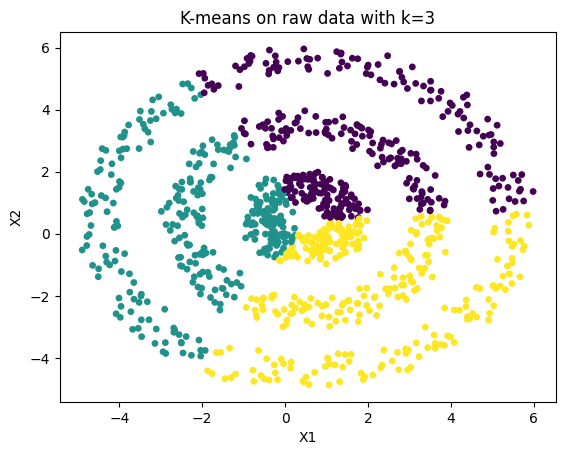

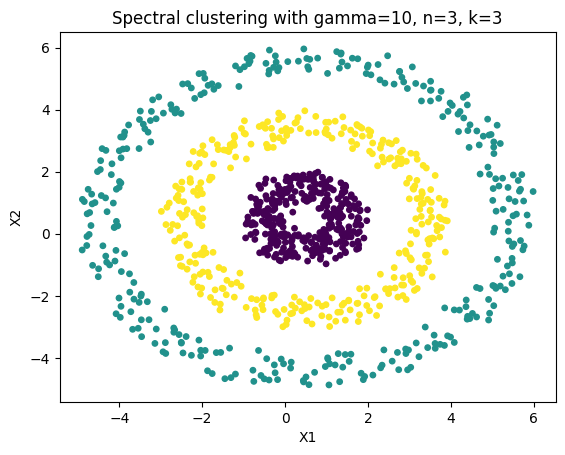

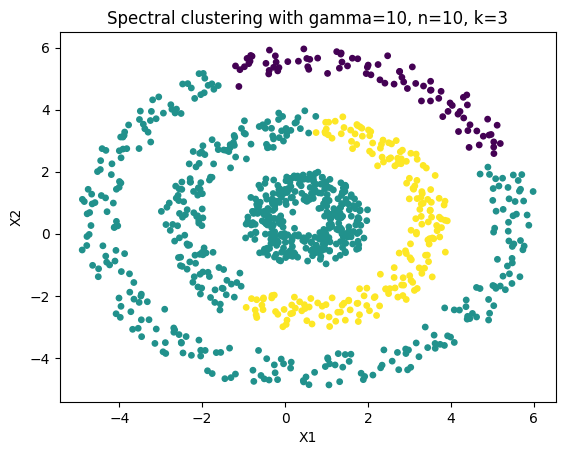

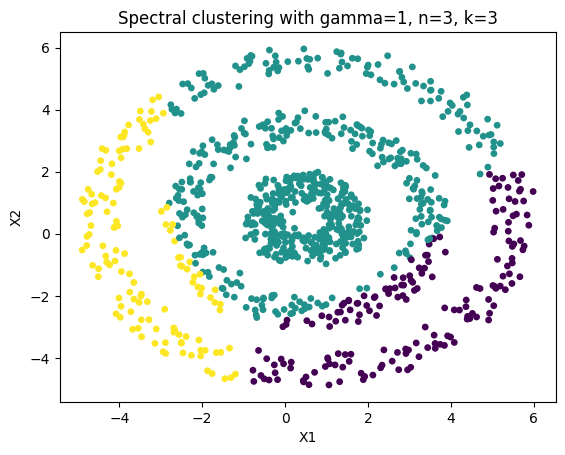

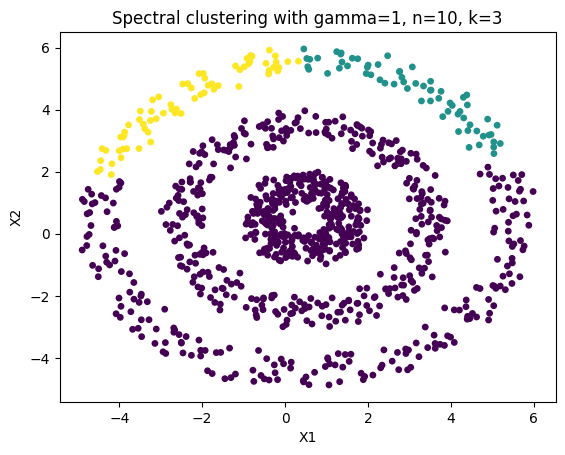

In [16]:
# Codewrite cell (Get the 5 scatter plots here)

# Generate scatterplots
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',s=15)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Main function to run the experiments
def main():
    np.random.seed(42)
    # Load the data from Dataset_A.npy
    data = np.load('Dataset_A.npy')
    
    # Perform k-means clustering on raw data
    labels_raw = kmeans(data, k=3)
    plot_clusters(data, labels_raw, "K-means on raw data with k=3")

    # Spectral clustering with different parameters
    gamma_values = [10, 1]
    n_values = [3, 10]
    k = 3
    
    for gamma in gamma_values:
        for n in n_values:
            labels_spectral = spectral_clustering(data, gamma, n, k)
            plot_clusters(data, labels_spectral, f"Spectral clustering with gamma={gamma}, n={n}, k={k}")

if __name__ == "__main__":
    main()

# Textwrite cell 

**K-means on raw data with k=3:**

This scatter plot shows the clusters found by applying k-means directly on the raw data. Since k-means is sensitive to the initial positions of         centroids, the clusters may not align well with the underlying data structure, especially if the data has non-convex shapes or varying densities.

**Spectral clustering with γ=10, n=3, k=3:**

Here, spectral clustering uses a high gamma value, leading to a very localized adjacency matrix where only very close points have significant weights. Using 3 eigenvectors, the clusters should capture the local structure better, potentially identifying more meaningful clusters compared to raw k-means.

**Spectral clustering with γ=10, n=10, k=3:**

With 10 eigenvectors, the feature matrix captures more global structure of the graph, potentially leading to different clusters. However, using too many eigenvectors can also introduce noise.

**Spectral clustering with γ=1, n=3, k=3:**

Lower gamma means the adjacency matrix has more significant weights for distant points, leading to a more global view of the data. Using 3 eigenvectors in this setting can help capture broader structures, potentially resulting in different clusters than the higher gamma scenario.

**Spectral clustering with γ=1, n=10, k=3:**

Similar to the previous setting but with more eigenvectors, which captures even more global structure. This result in clusters that consider broader relationships in the data, potentially smoothing out some local variances.

By varying gamma and the number of eigenvectors, we can observe how the locality and globality of the data representation affect the resulting clusters. Higher gamma emphasizes local relationships, while lower gamma and more eigenvectors emphasize global structure

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter. 

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label. 

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [ ]:
# Codewrite cell (Use as you wish)

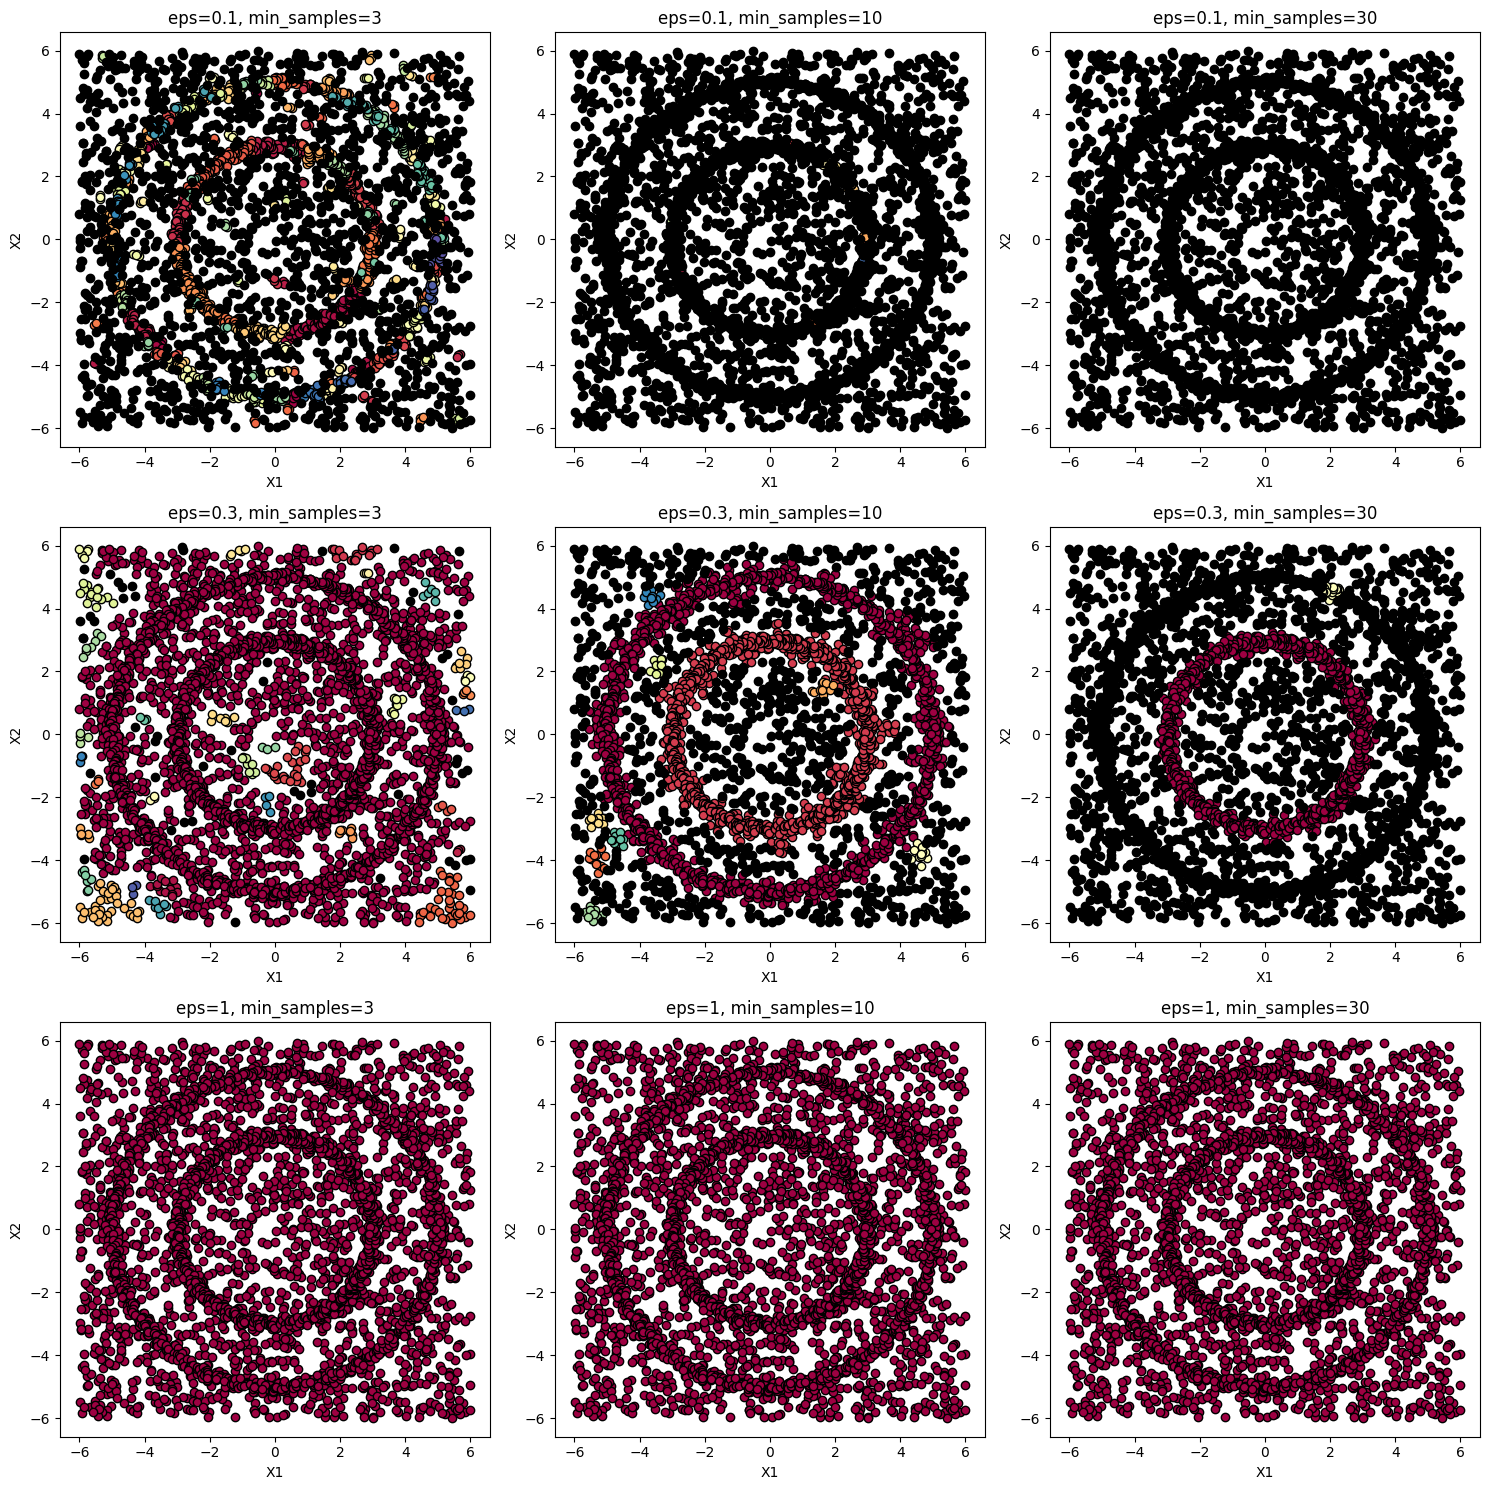

In [18]:
# Codewrite cell. Get the 9 plots here.

# Load the dataset
dataset = np.load('Dataset_B.npy')

# Parameters to explore
eps_values = [0.1, 0.3, 1]
min_samples_values = [3, 10, 30]

# Plotting the results
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(dataset)
        labels = db.labels_

        # Plotting
        ax = axes[i, j]
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = dataset[class_member_mask]
            ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')

plt.tight_layout()
plt.show()


# Textwrite cell

**Effect of eps:**

1. Small eps (0.1): Results in many small clusters and a significant number of points labeled as noise. The algorithm is too restrictive, resulting in fragmented clusters.
2. Medium eps (0.3): A balance between cluster size and number of noise points. Clusters are more coherent and less fragmented.
3. Large eps (1): Few large clusters with fewer noise points. The algorithm is too permissive, potentially merging distinct clusters.

**Effect of min_samples:**

1. Small min_samples (3): Tends to find more clusters including smaller ones, but also results in more noise points. Sensitive to noise.
2. Medium min_samples (10): Finds a moderate number of clusters with reasonable noise filtering. Suitable for balanced clustering.
3. Large min_samples (30): Finds fewer clusters and fewer noise points. Only dense regions are identified as clusters.

**Combination of Parameters:**

1. The choice of eps and min_samples significantly affects the clustering results.
2. A smaller eps with a higher min_samples value can result in very few clusters and high noise.
3. Conversely, a larger eps with a lower min_samples can lead to large, potentially inaccurate clusters with less noise.

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy. 

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [2]:
# Codewrite cell (Use as you wish)

# Load Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Custom train-test split function
def custom_train_test_split(X, y, train_size=0.8, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    train_size = int(len(X) * train_size)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, train_size=1500/1797, random_state=42)

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Custom k-NN classifier
class CustomKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = np.bincount(k_nearest_labels).argmax()
            predictions.append(most_common)
        return np.array(predictions)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.sum(y_pred == y) / len(y)

# Function to perform PCA
def custom_pca(X, n_components):
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    # Compute covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors by eigenvalues in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    # Select the top n_components
    eigenvector_subset = sorted_eigenvectors[:, :n_components]
    # Transform the data
    X_reduced = np.dot(X_centered, eigenvector_subset)
    return X_reduced

# Function to run k-NN and report accuracy
def run_knn(X_train, X_test, y_train, y_test, k_values):
    accuracies = {}
    for k in k_values:
        knn = CustomKNN(k=k)
        knn.fit(X_train, y_train)
        train_accuracy = knn.score(X_train, y_train)
        test_accuracy = knn.score(X_test, y_test)
        accuracies[k] = (train_accuracy, test_accuracy)
        #print(f'k={k} -> Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')
    return accuracies

In [ ]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)

# Run k-NN for original data
#print("Original Data:")
k_values = [1, 3, 7, 15, 31]
original_accuracies = run_knn(X_train, X_test, y_train, y_test, k_values)

# Apply PCA and run k-NN for each n in n_components
n_components_list = [2, 4, 8, 16, 32]
pca_results = {}

#print("\nPCA Data:")
for n_components in n_components_list:
    X_train_pca = custom_pca(X_train, n_components)
    X_test_pca = custom_pca(X_test, n_components)
    pca_accuracies = run_knn(X_train_pca, X_test_pca, y_train, y_test, k_values)
    
    best_k = max(pca_accuracies, key=lambda k: pca_accuracies[k][1])
    best_accuracy = pca_accuracies[best_k][1]
    approximation_error = 1 - best_accuracy
    pca_results[n_components] = (best_k, best_accuracy, approximation_error)
    #print(f'n_components={n_components} -> Best k={best_k}, Best Test Accuracy: {best_accuracy:.4f}, Approximation Error: {approximation_error:.4f}')

In [ ]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)

k_values = [1, 3, 7, 15, 31]
n_components_list = [2, 4, 8, 16, 32]
pca_results = {}
# Add Gaussian noise to the dataset
mean = 0
variance = 1
noise = np.random.normal(mean, np.sqrt(variance), X.shape)
X_noisy = X + noise

# Split the noisy data into train and test sets
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = custom_train_test_split(X_noisy, y, train_size=1500/1797, random_state=42)

#print("\nNoisy Data:")
noisy_accuracies = run_knn(X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy, k_values)

#print("\nPCA on Noisy Data:")
for n_components in n_components_list:
    X_train_pca_noisy = custom_pca(X_train_noisy, n_components)
    X_test_pca_noisy = custom_pca(X_test_noisy, n_components)
    pca_noisy_accuracies = run_knn(X_train_pca_noisy, X_test_pca_noisy, y_train_noisy, y_test_noisy, k_values)
    
    best_k = max(pca_noisy_accuracies, key=lambda k: pca_noisy_accuracies[k][1])
    best_accuracy = pca_noisy_accuracies[best_k][1]
    approximation_error = 1 - best_accuracy
    pca_results[n_components] = (best_k, best_accuracy, approximation_error)
    #print(f'n_components={n_components} -> Best k={best_k}, Best Test Accuracy: {best_accuracy:.4f}, Approximation Error: {approximation_error:.4f}')

# Textwrite cell

**Table 1: Raw data , k-NN performance. One row for each k.**

k value | Train Accuracy | Test Accuracy 
--- | --- | --- 
1 | 1.0000 | 0.9832
3 | 0.9933 | 0.9865
7 | 0.9887 | 0.9798
15 | 0.9833 | 0.9731
31 | 0.9700 | 0.9596

**Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.**

n | Best k | Approximation Error  | Test Accuray
--- | --- | --- | ---
2| 3|0.0774| 0.9226
4|7|0.0640| 0.9360
8 |7|0.0370| 0.9630
16 |3|0.0370|0.9630
32 |1|0.0438| 0.9562

**Table 3: Raw noised data, k-NN performance. One row for each k.**

k value | Train Accuracy | Test Accuracy 
--- | --- | --- 
1 |1.0000|0.9865
3|0.9927| 0.9899
7 |0.9887|0.9832
15 |0.9807| 0.9731
31 |0.9713|0.9529

**Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.**

n | Best k | Approximation Error | Test Accuracy
--- | --- | --- | ---
2 |31| 0.0842|0.9158
4|15| 0.1313| 0.8687
8 |3|0.1380|0.8620
16|1| 0.1044|0.8956
32|1|0.1111|0.8889





# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3. 

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here. 

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [19]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


In [20]:
# Codewrite cell (Use as you wish)

def multivariate_gaussian_pdf(x, mean, cov):
    n = mean.size
    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    exponent = np.einsum('...k,kl,...l->...', diff, inv_cov, diff)
    return np.exp(-0.5 * exponent) / np.sqrt((2 * np.pi) ** n * np.linalg.det(cov))

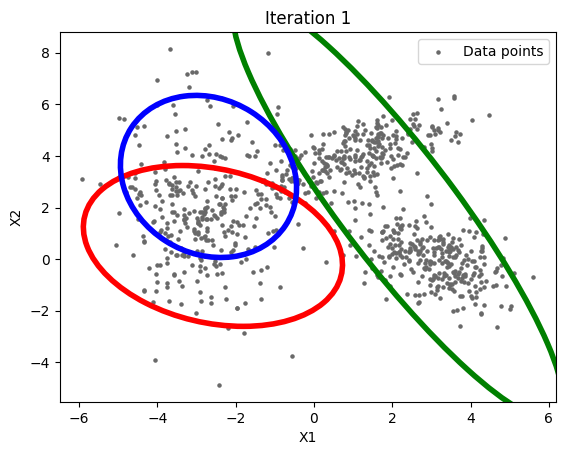

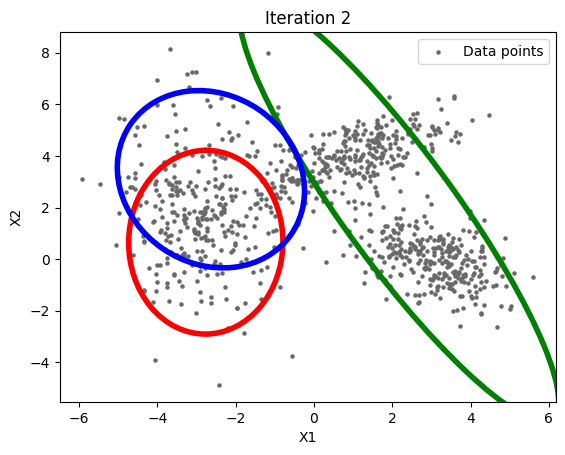

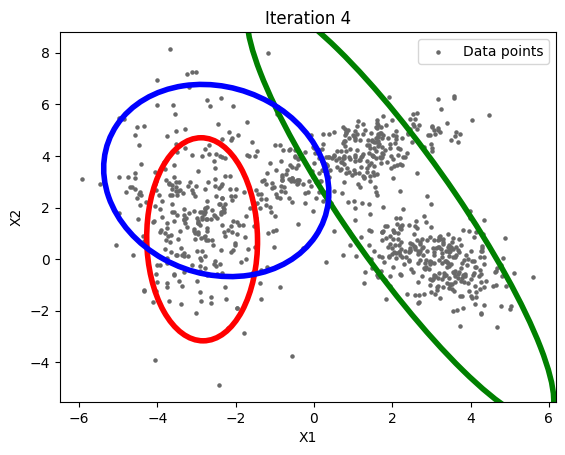

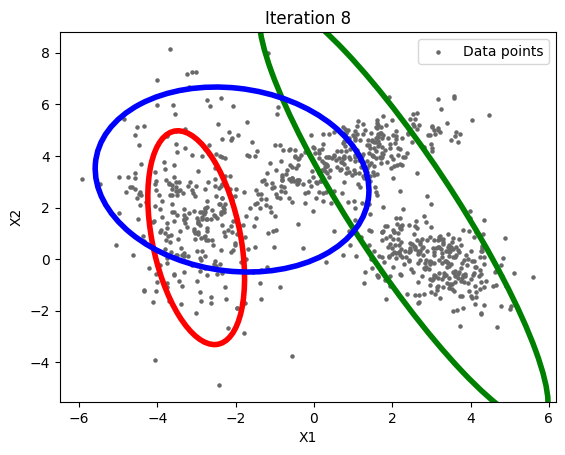

In [32]:
# Code write: Get the four plots with component contours here

# Load dataset
data = np.load('Dataset_C.npy')

# Parameters
n_components = 3
n_iterations = 8

# Initialization
np.random.seed(0)
n_samples, n_features = data.shape
means = data[np.random.choice(n_samples, n_components, False)]
covariances = np.array([np.eye(n_features)] * n_components)
weights = np.ones(n_components) / n_components

log_likelihoods = []

# EM Algorithm
for iteration in range(n_iterations + 1):
    # E-step
    responsibilities = np.zeros((n_samples, n_components))
    for k in range(n_components):
        responsibilities[:, k] = weights[k] * multivariate_gaussian_pdf(data, means[k], covariances[k])
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    
    # M-step
    Nk = responsibilities.sum(axis=0)
    weights = Nk / n_samples
    means = np.dot(responsibilities.T, data) / Nk[:, np.newaxis]
    covariances = np.zeros((n_components, n_features, n_features))
    for k in range(n_components):
        diff = data - means[k]
        covariances[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]
    
    # Compute log likelihood
    log_likelihood = np.sum(np.log(np.sum([weights[k] * multivariate_gaussian_pdf(data, means[k], covariances[k]) for k in range(n_components)], axis=0)))
    log_likelihoods.append(log_likelihood)
    
    # Plotting
    if iteration in [1, 2, 4, 8]:
        fig, ax = plt.subplots()
        ax.scatter(data[:, 0], data[:, 1], c='dimgray', s=5, label='Data points')
        plot_ellipses_gmm(means, covariances, ax)
        ax.set_title(f'Iteration {iteration}')
        plt.legend()
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()

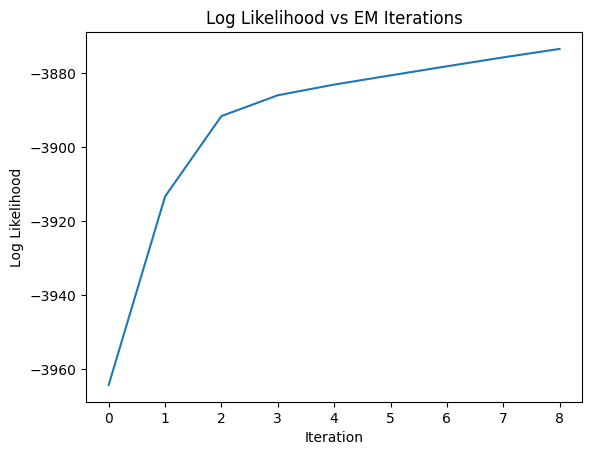

In [33]:
#Code write: Get the plot of iterations vs L(q;theta) and ln P(X|theta) here.
 
# Plot log likelihood
plt.figure()
plt.plot(range(n_iterations + 1), log_likelihoods)
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs EM Iterations')
plt.show()